In [2]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from mpl_toolkits import mplot3d
import matplotlib

from numpy import math
import seaborn as sns; sns.set()
from pandas import DataFrame
import pandas as pd

import numpy.random as rnd

import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit

import sklearn

from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import max_error
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from random import randint
from numpy import pi
from random import random
import numpy.polynomial.polynomial as poly
import Harmonic_functions_and_waveform as hf
import joblib
from joblib import dump, load

from sklearn.linear_model import LinearRegression

from IPython.display import Audio
sound_file = './gameboy_sound.wav'

import pickle

In [26]:
# source /cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/bin/activate igwn-py38

## Training Data import

In [131]:
Newtraining2000V3 = pd.read_csv("FinalTrain_V3.csv",sep=',')

FileNotFoundError: [Errno 2] File b'Data_test2000.csv' does not exist: b'Data_test2000.csv'

## Real Data

In [3]:
NoiseData = pd.read_csv("RealData_JustNoise.csv",sep=',')

#noise data

noisedataV1 = pd.read_csv("RealData_JustNoise.csv",sep=',')
noisedataV2 = pd.read_csv("RealData_JustNoiseV2.csv",sep=',')
noisedataV3 = pd.read_csv("RealData_JustNoiseV3.csv",sep=',')
noisedataV4 = pd.read_csv("RealData_JustNoiseV4.csv",sep=',')
noisedataV5 = pd.read_csv("RealData_JustNoiseV5.csv",sep=',')
noisedataV6 = pd.read_csv("RealData_JustNoiseV6.csv",sep=',')
noisedataV7 = pd.read_csv("RealData_JustNoiseV7.csv",sep=',')
noisedataV8 = pd.read_csv("RealData_JustNoiseV8.csv",sep=',')
noisedataV9 = pd.read_csv("RealData_JustNoiseV9.csv",sep=',')
noisedataV10 = pd.read_csv("RealData_JustNoiseV10.csv",sep=',')

noise_large = pd.read_csv("real_noise_large.csv",sep=',')

FileNotFoundError: [Errno 2] File b'RealData_JustNoise.csv' does not exist: b'RealData_JustNoise.csv'

In [2]:
model = joblib.load('final_model.sav')

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Predict Sigma Function

In [4]:
def sigma_predict(data, layer1, layer2):
    
    X_precess = data.drop('sigma', axis=1)
    X_precess = X_precess.drop('theta', axis=1)
    X_precess = X_precess.drop('phase', axis=1)
    y_precess = data['sigma']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_precess, y_precess,
                                                random_state=47, train_size = 0.8)
    sqroot = Xtest['square root']
    mean   = Xtest['mean']
    
    Xtrain = Xtrain.drop('square root', axis=1)
    Xtrain = Xtrain.drop('mean', axis=1)
    
    Xtest  = Xtest.drop('square root', axis=1)
    Xtest  = Xtest.drop('mean', axis=1)
    
    model  = MLPRegressor(hidden_layer_sizes = (layer1, layer2), max_iter=2000, learning_rate_init = 0.01, warm_start=False)
    
    model.fit(Xtrain, ytrain)      
    y_model = model.predict(Xtest)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_model))
    print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))
    
    #plt.plot(model.loss_curve_)
    
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    plt.figure(figsize=(15,10))
    plt.scatter(ytest, y_model, c = 'black')
    plt.plot(ytest, ytest, c = 'yellow', label = 'Actual vs actual', linewidth = 3)
    #plt.scatter(ytest, mean, c = 'blue')
    #plt.scatter(ytest, sqroot, c = 'orange')
    plt.xlabel('Actual', size=25)
    plt.ylabel('Predicted', size=25)
    plt.title('Predicting Sigma', size = 25)
    
    #x = ytest
    #y = y_model
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'magenta', label = 'Line of best fit for predicted sigma', linewidth = 3)
    
    #x = ytest
    #y = sqroot
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b,c = 'red', label = 'Line of best fit for quadrature sum (L2 norm)', linewidth = 3)
    
    #x = ytest
    #y = mean
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'green', label = 'Line of best fit for mean of SNRs', linewidth = 3)
    
    plt.legend(fontsize = 22)
    
    return model, ytest, y_model

Mean Absolute Error: 0.03617188900205913
Mean Squared Error: 0.01760876679352165
Root Mean Squared Error: 0.13269802859696767


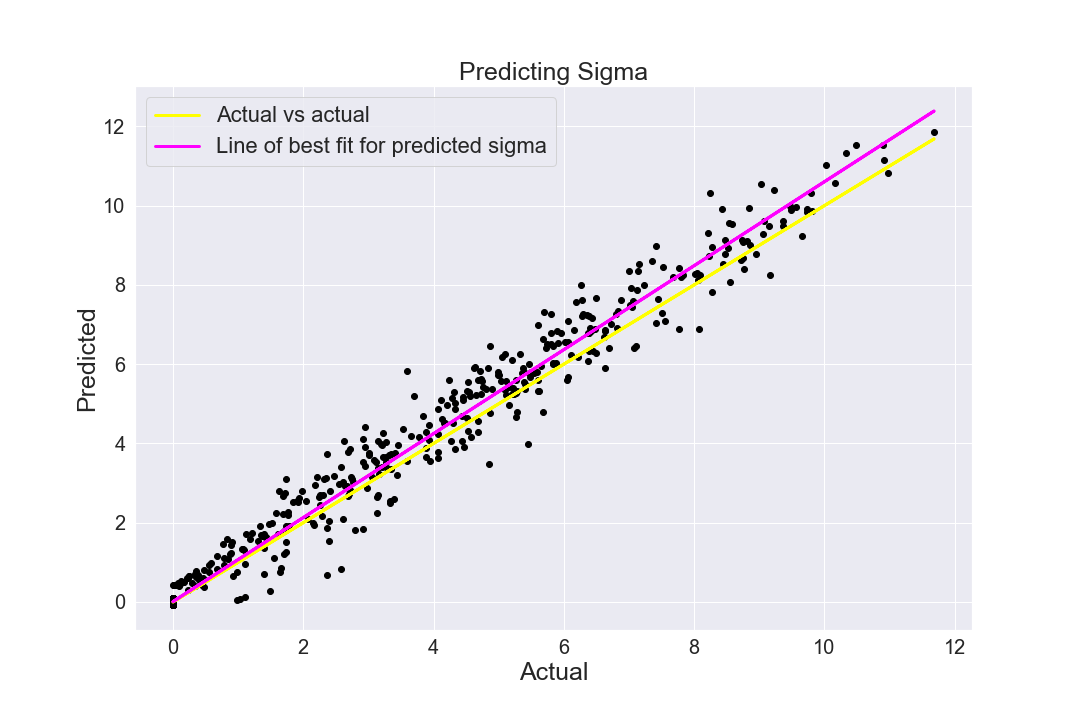

In [17]:
model_small, ytestsmall, ymodelsmall = sigma_predict(Newtraining2000V3, 10, 5)

Mean Absolute Error: 0.006793982371159349
Mean Squared Error: 0.0018728947674252886
Root Mean Squared Error: 0.04327695422999739


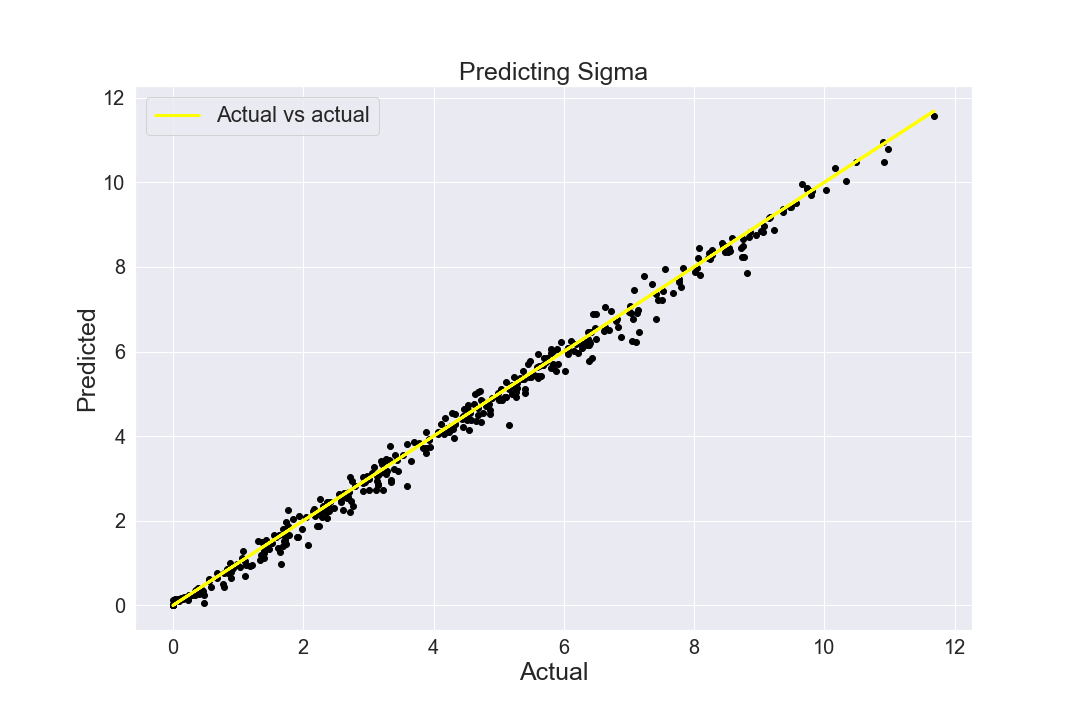

In [21]:
model_V3, ytestV3, ymodelV3 = sigma_predict(Newtraining2000V3, 650, 125)

In [83]:
joblib.dump(model_V3, 'final_model.sav')

['final_model.sav']

In [2]:
model = joblib.load('final_model.sav')

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Predictions on pure noise

In [19]:
predic_noiseV1 = model.predict(noisedataV1)
predic_noiseV2 = model.predict(noisedataV2)
predic_noiseV3 = model.predict(noisedataV3)
predic_noiseV4 = model.predict(noisedataV4)
predic_noiseV5 = model.predict(noisedataV5)
predic_noiseV6 = model.predict(noisedataV6)
predic_noiseV7 = model.predict(noisedataV7)
predic_noiseV8 = model.predict(noisedataV8)
predic_noiseV9 = model.predict(noisedataV9)
predic_noiseV10 = model.predict(noisedataV10)

predic_noise = (predic_noiseV1 + predic_noiseV2 + predic_noiseV3 + predic_noiseV4 + predic_noiseV5 + predic_noiseV6 + predic_noiseV7 + predic_noiseV8 + predic_noiseV9 + predic_noiseV10)/10

Text(0.5, 1.0, 'Predicing sigma in pure noise')

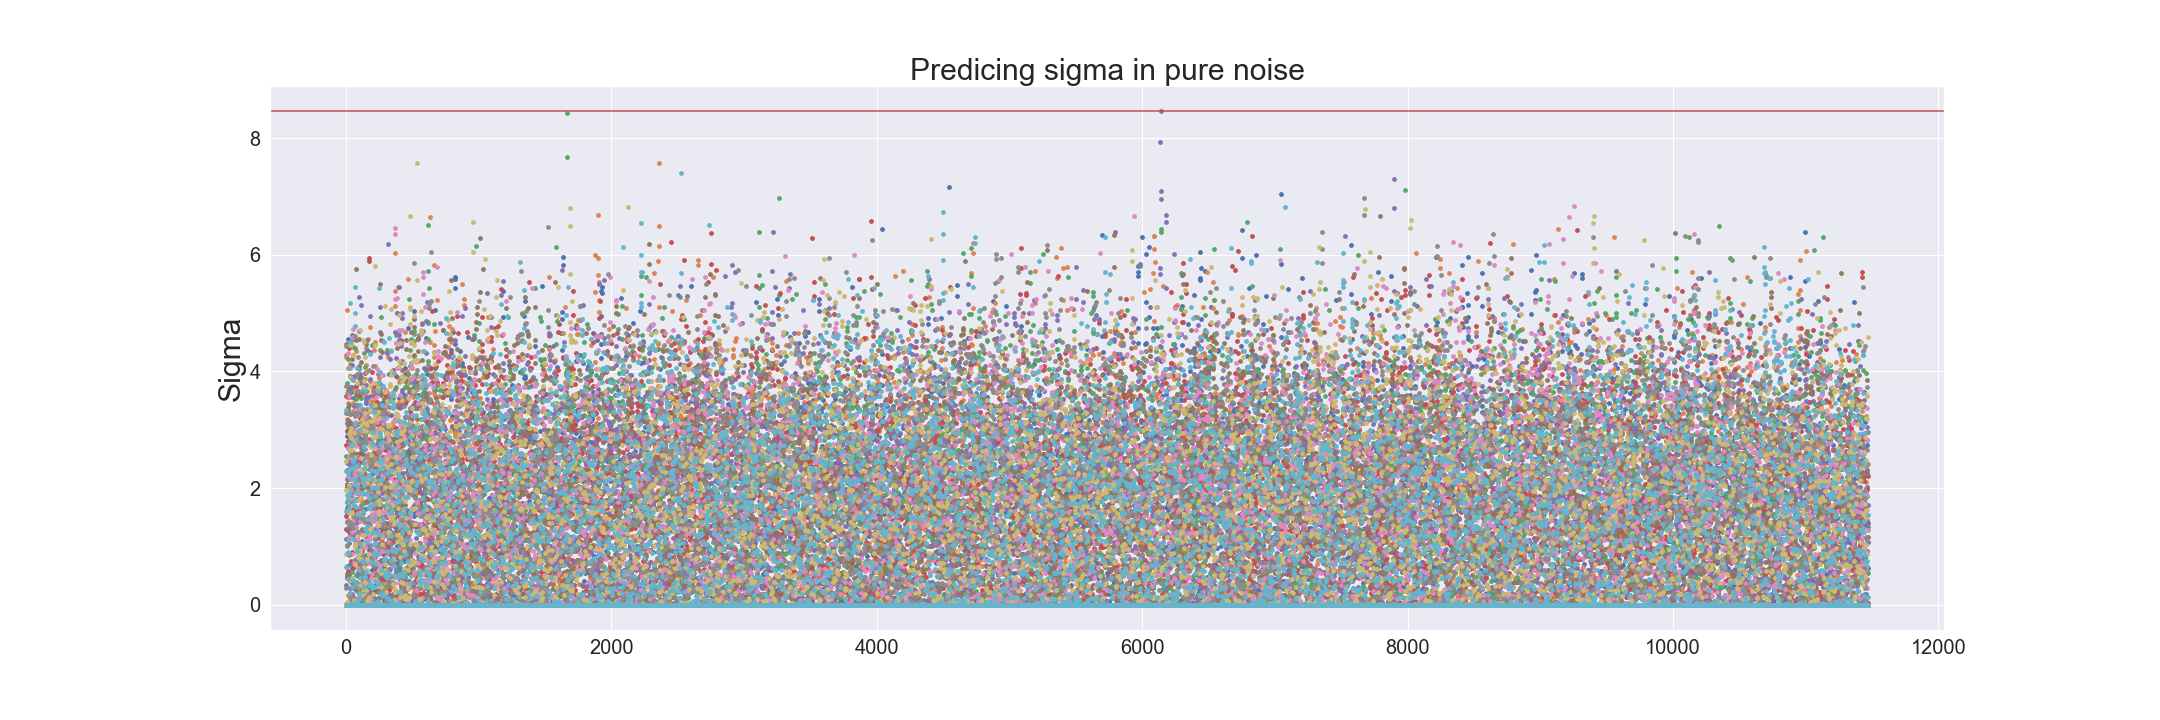

In [39]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV1, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV2, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV3, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV4, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV5, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV6, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV7, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV8, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV9, s = 14)
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noiseV10, s = 14)

#plt.plot(np.linspace(0,len(predic_noise),10) , np.linspace(7.99,8, 10))

plt.axhline(y=8.47, color='r', linestyle='-')

plt.ylabel('Sigma', fontsize = 30)
plt.title('Predicing sigma in pure noise', fontsize = 30)

In [ ]:
# predict on 100 runs
predictions = []

filename = "real_noise_100runs.csv" 

data = pd.read_csv(filename,sep=',')

predic = model.predict(data)

predictions.append(predic)

print('Done')

In [ ]:
plt.figure(figsize=(30,10))
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30)

plt.hist(predictions[predictions>0.01],bins = 1000);

plt.xlabel('predicted sigma value', fontsize = 30)
plt.ylabel('Number of occurences', fontsize = 30)

plt.title('Histogram of predicted sigma values in 12800 seconds of noise', fontsize = 30)

# Noise statistics


In [15]:
prediction = open('predic_noise_50runs')
x = prediction.read().splitlines()

y = np.array(x)

f = y.astype(float)

In [16]:
len(f)

10485800

Text(0.5, 1.0, 'Histogram of predicted sigma values in 12800 seconds of noise')

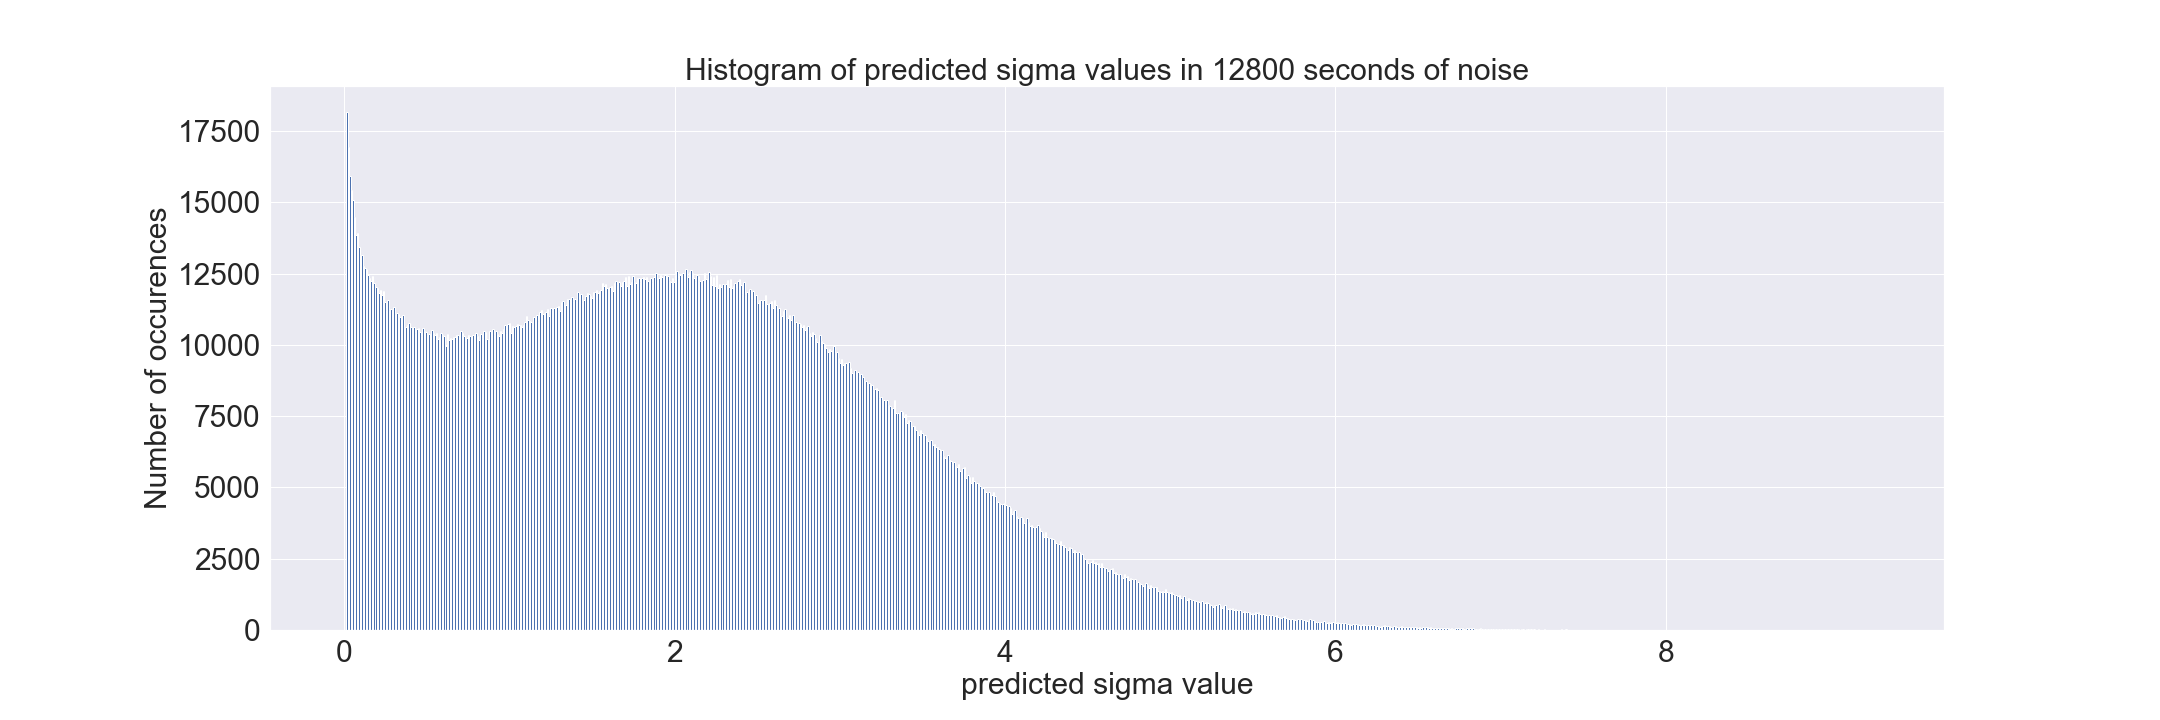

In [3]:
prediction = open('predic_noise_50runs')
x = prediction.read().splitlines()

y = np.array(x)

f = y.astype(float)

plt.figure(figsize=(30,10))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.hist(f[f>0.01],bins = 1000);

plt.xlabel('predicted sigma value', fontsize = 30)
plt.ylabel('Number of occurences', fontsize = 30)

plt.title('Histogram of predicted sigma values in 12800 seconds of noise', fontsize = 30)

#plt.xlim(0,10)
#plt.ylim(0,10)

In [28]:
D = np.std(f)

Sigma_6_D = 6 * D
chance = 1/506797346

num_sig = (4096*12800)*chance
print('Number of predictions with sigma of', Sigma_6_D, 'in 12800 seconds of data is',num_sig)

Number of predictions with sigma of 8.040813419142326 in 12800 seconds of data is 0.10345121262730528


(8.6, 9.3)

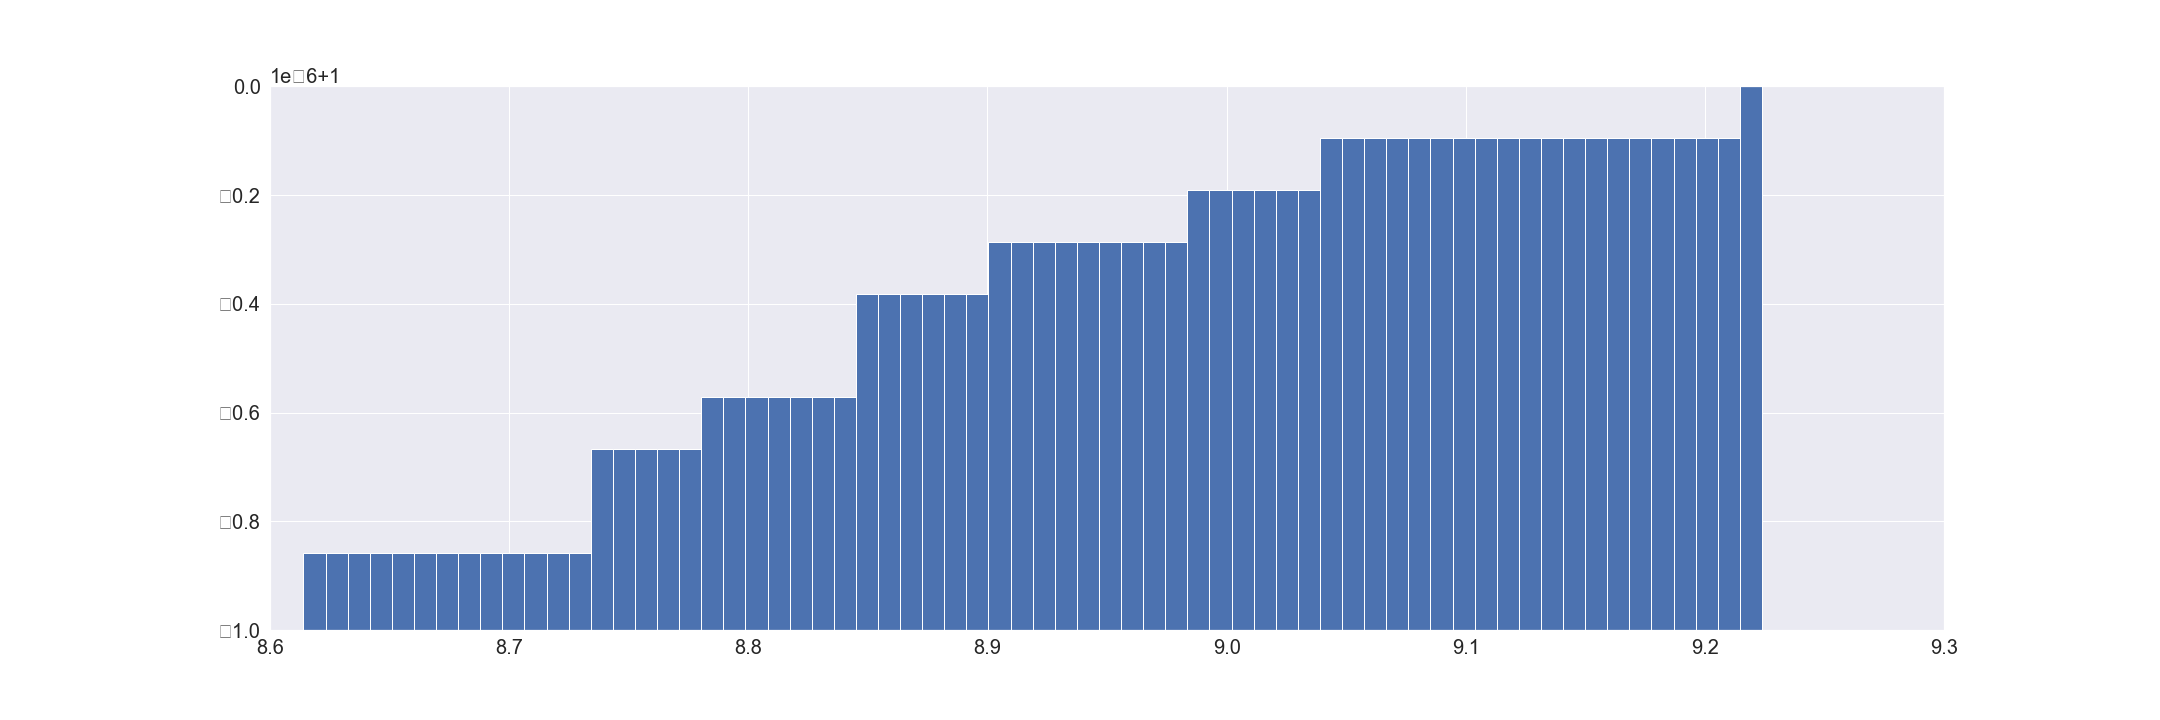

In [59]:
plt.figure(figsize=(30,10))
plt.hist(f, cumulative=True, density=True, bins = 1000);
plt.ylim(0.999999,1)
#plt.ylim(0.9999,1)
plt.xlim(8.6,9.3)

In [49]:
len(f)

10485800

In [3]:
prediction = open('predic_noise_10runs')
x = prediction.read().splitlines()

y = np.array(x)

f = y.astype(float)

Text(0.5, 0, 'predicted sigma value')

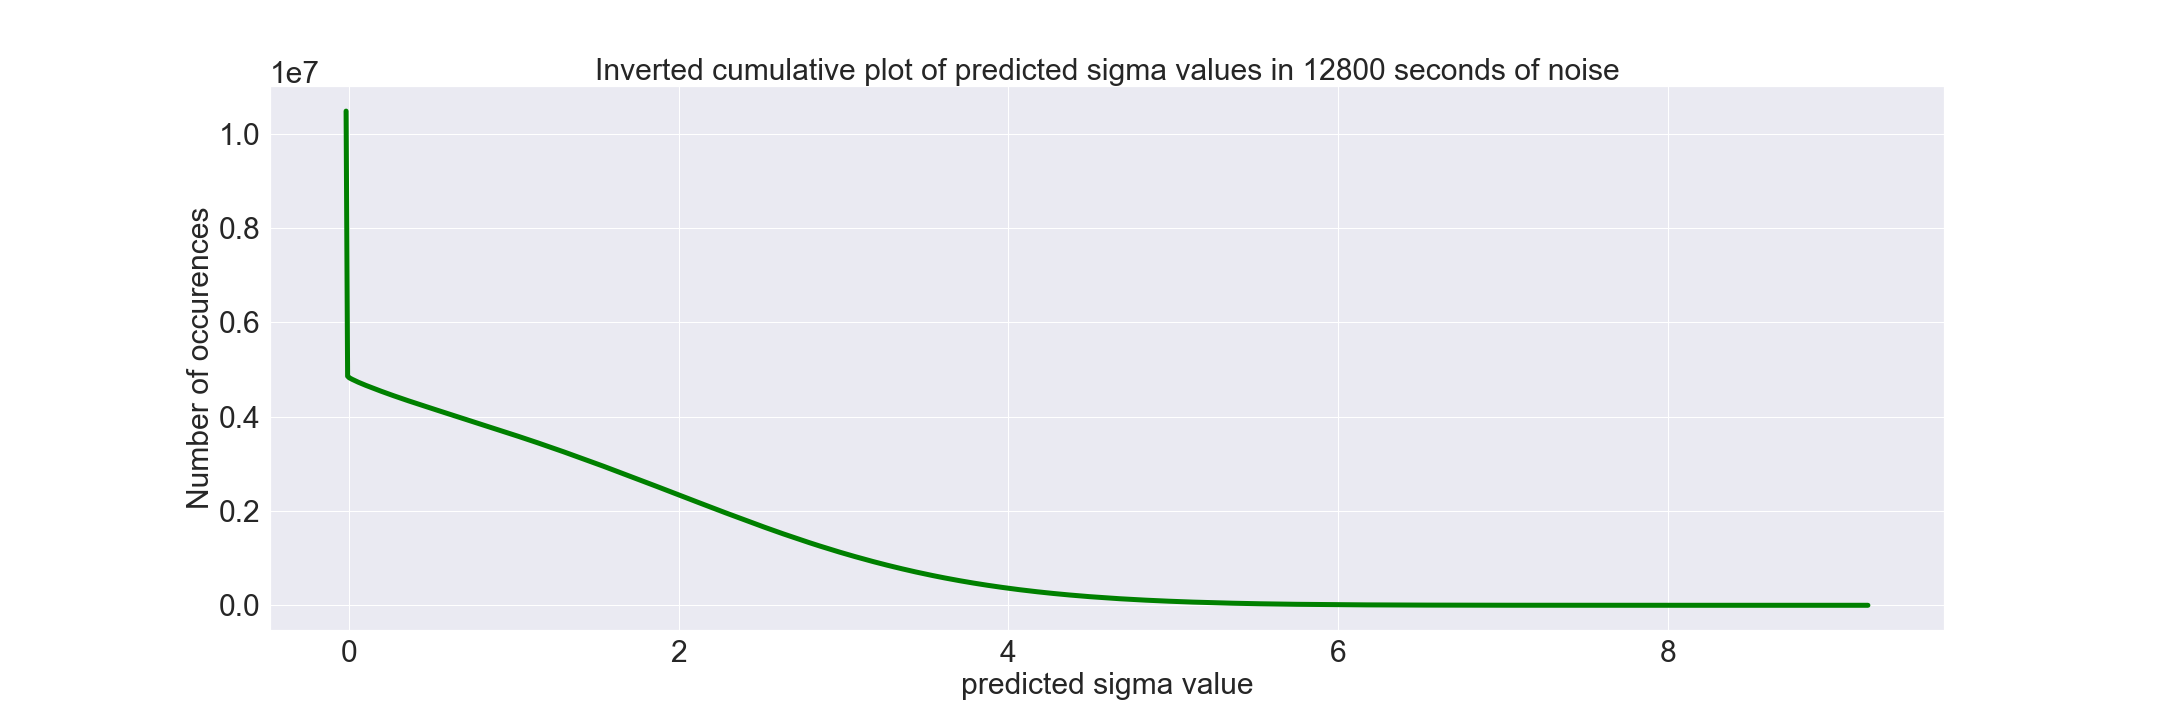

In [7]:
plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

# some fake data
data = f
# evaluate the histogram
values, base = np.histogram(data, bins=1000)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
#plt.plot(base[:-1], cumulative, c='blue')
#plot the survival function
plt.plot(base[:-1], len(data)-cumulative, c='green', linewidth = 5)
#plt.ylim(12720,12730)
#plt.xlim(5.999,6.001)
plt.title('Inverted cumulative plot of predicted sigma values in 12800 seconds of noise', fontsize = 30)
plt.ylabel('Number of occurences', fontsize = 30)
plt.xlabel('predicted sigma value', fontsize = 30)

#plt.axhline(y=55.3, color='r', linestyle='-', linewidth = 3)



In [9]:
len(f) # 12800 seconds of data

10485800

In [10]:
len(f[f>0.01])

4830786

In [13]:
len(f[f>6]), len(f[f>7]), len(f[f>8]), len(f[f>=9])

(12956, 1232, 56, 2)

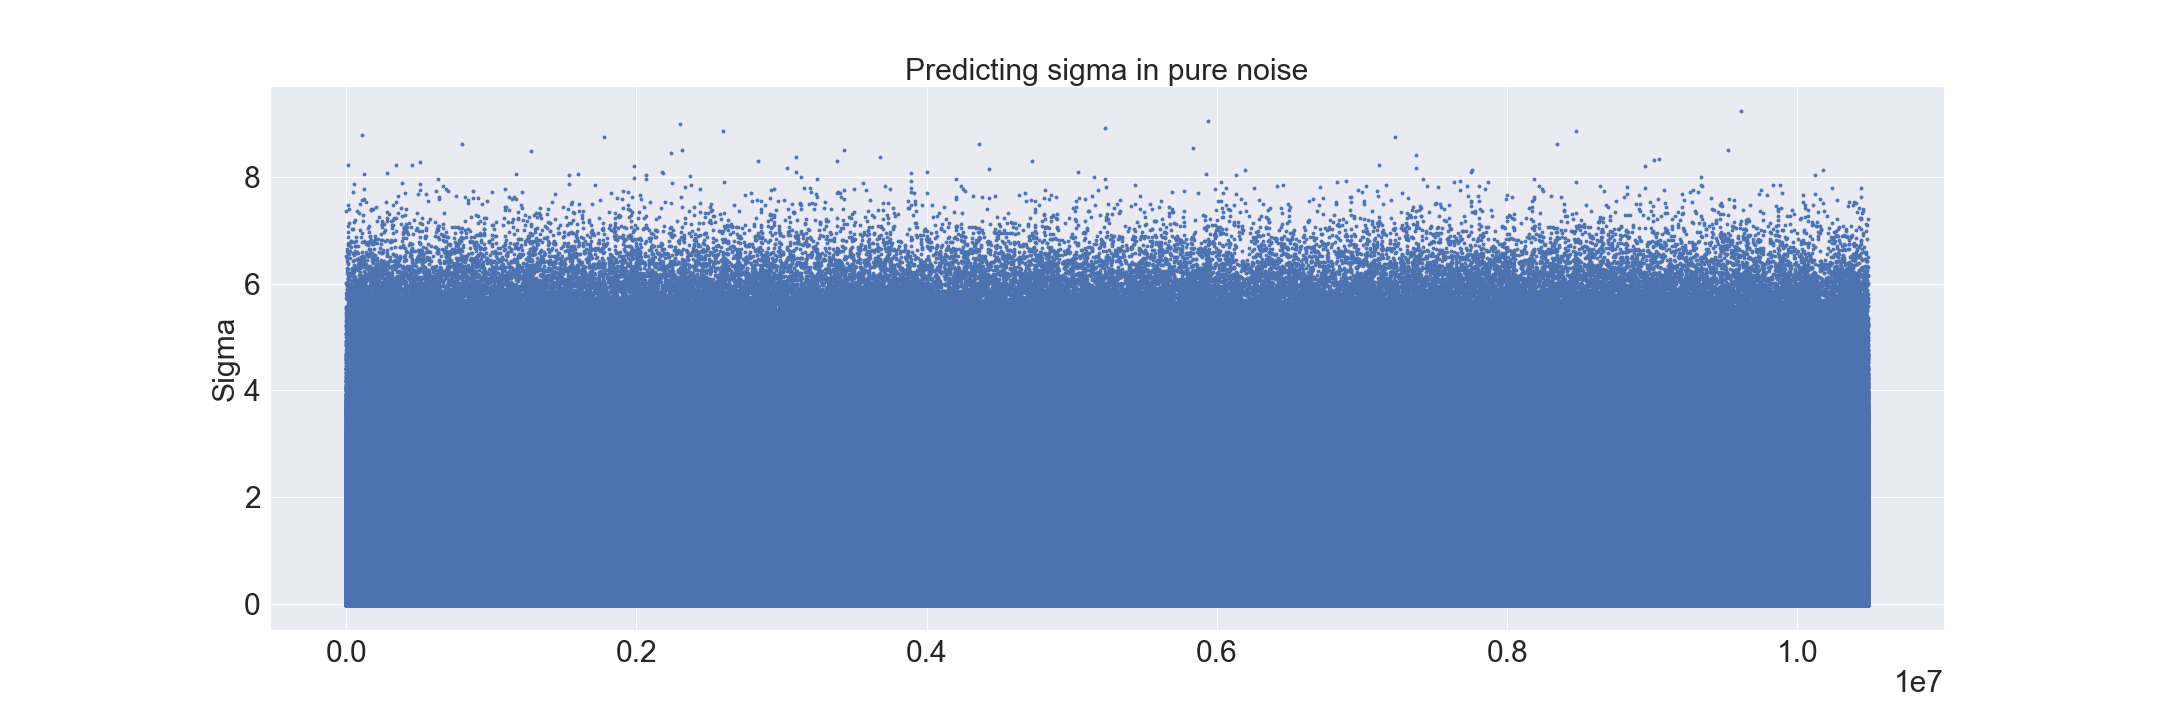

In [5]:
plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

#plt.axhline(y=9.218, color='r', linestyle='-', linewidth = 3)

plt.ylabel('Sigma', fontsize = 30)
plt.title('Predicting sigma in pure noise', fontsize = 30)

plt.scatter(np.linspace(0,len(f),len(f)), f, s = 8)

In [17]:
len(f)

838864